In [ ]:
from tensorflow import keras
import numpy as np
from numpy import array
from keras.preprocessing.text import Tokenizer
from tensorflow.keras.utils import to_categorical
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense,Input
from keras.models import Model

https://www.analyticsvidhya.com/blog/2021/06/complete-guide-on-how-to-use-autoencoders-in-python/


In [ ]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

11501568/11490434 [==============================] - 0s 0us/step


In [ ]:
x_train = x_train.reshape(-1, 784)
x_test = x_test.reshape(-1,784 )
print(x_train.shape)
print(x_test.shape)

(60000, 784)
(10000, 784)


In [ ]:
y_train=to_categorical(y_train,num_classes=10)
y_test=to_categorical(y_test,num_classes=10)

In [ ]:
print(y_train.shape)
print(y_test.shape)

(60000, 10)
(10000, 10)


In [ ]:
x_train= x_train/255.0
x_test= x_test/255.0

In [ ]:
print(y_train.shape)
print(y_test.shape)
print(x_train.shape)
print(x_test.shape)

(60000, 10)
(10000, 10)
(60000, 784)
(10000, 784)


##_AutoEncoder -1_

In [ ]:
I1 = Input(shape=(784,))
h1  = Dense(100,activation="sigmoid")(I1)
o1 = Dense(784,activation="sigmoid")(h1)

In [ ]:
autoencoder_1= Model(inputs=I1,outputs=o1)
autoencoder_1.compile(loss="mse",optimizer="adam",metrics=["accuracy"])
autoencoder_1.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 784)]             0         
                                                                 
 dense (Dense)               (None, 100)               78500     
                                                                 
 dense_1 (Dense)             (None, 784)               79184     
                                                                 
Total params: 157,684
Trainable params: 157,684
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history1=autoencoder_1.fit(x_train,x_train,epochs=10)

Epoch 1/10
1875/1875 [==============================] - 9s 3ms/step - loss: 0.0030 - accuracy: 0.0015
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 1.8553e-05 - accuracy: 0.0023
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 5.2182e-06 - accuracy: 0.0030
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 2.3316e-06 - accuracy: 0.0089
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 1.5028e-06 - accuracy: 0.0150
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 1.2353e-06 - accuracy: 0.0144
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 1.1384e-06 - accuracy: 0.0144
Epoch 8/10
1875/1875 [==============================] - 7s 4ms/step - loss: 1.0989e-06 - accuracy: 0.0145
Epoch 9/10
1875/1875 [==============================] - 6s 3ms/step - loss: 1.0807e-06 - accuracy: 0.0147
Epoch 10/10
1875/1875 [===========================

Text(0.5, 1.0, 'Predicted')

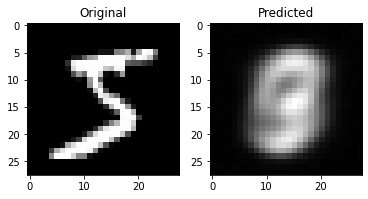

In [ ]:
import matplotlib.pyplot as plt
original_img = x_train[0].reshape(28,28)
predicted_img = autoencoder_1.predict(x_train[0].reshape(1,784))[0].reshape(28,28)

fig, (ax1, ax2) = plt.subplots(1,2)
ax1.imshow(original_img, cmap='gray')
ax1.set_title('Original')
ax2.imshow(predicted_img, cmap='gray')
ax2.set_title('Predicted')

In [ ]:
ae1_hidden_output = autoencoder_1.layers[1].output
trimmed_ae1 = Model(inputs=I1,outputs=ae1_hidden_output)
trimmed_ae1.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 784)]             0         
                                                                 
 dense (Dense)               (None, 100)               78500     
                                                                 
Total params: 78,500
Trainable params: 78,500
Non-trainable params: 0
_________________________________________________________________


In [ ]:
x_train_ae1 =trimmed_ae1.predict(x_train)

In [ ]:
x_test_ae1 =trimmed_ae1.predict(x_test)

In [ ]:
I2 = Input(shape=(100,))
h2 = Dense(50,activation="sigmoid")(I2)
o2 = Dense(100,activation="sigmoid")(h2)
autoencoder_2 = Model(inputs=I2,outputs=o2)
autoencoder_2.compile(loss="mse",optimizer="adam",metrics=["accuracy"])

autoencoder_2.summary()



Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 100)]             0         
                                                                 
 dense_2 (Dense)             (None, 50)                5050      
                                                                 
 dense_3 (Dense)             (None, 100)               5100      
                                                                 
Total params: 10,150
Trainable params: 10,150
Non-trainable params: 0
_________________________________________________________________


In [ ]:
autoencoder_2.fit(x_train_ae1,x_train_ae1,epochs=10)

Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 2.0720e-04 - accuracy: 0.6284
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 1.3240e-05 - accuracy: 0.7573
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 1.2803e-05 - accuracy: 0.7421
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 1.2061e-05 - accuracy: 0.7911
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 1.1011e-05 - accuracy: 0.9188
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 1.0068e-05 - accuracy: 0.9446
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 8.5504e-06 - accuracy: 0.9551
Epoch 8/10
1875/1875 [==============================] - 5s 3ms/step - loss: 7.4860e-06 - accuracy: 0.9579
Epoch 9/10
1875/1875 [==============================] - 5s 3ms/step - loss: 6.4722e-06 - accuracy: 0.9586
Epoch 10/10
1875/1875 [=======================

In [ ]:
ae2_hidden_output = autoencoder_2.layers[1].output
trimmed_ae2 = Model(inputs=I2,outputs=ae2_hidden_output)
trimmed_ae2.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 100)]             0         
                                                                 
 dense_2 (Dense)             (None, 50)                5050      
                                                                 
Total params: 5,050
Trainable params: 5,050
Non-trainable params: 0
_________________________________________________________________


In [ ]:
x_train_ae2 =trimmed_ae2.predict(x_train_ae1)

In [ ]:
x_test_ae1 =trimmed_ae2.predict(x_test_ae1)

In [ ]:
I3 = Input(shape=(50,))
o3 = Dense(10,activation="softmax")(I3)
autoencoder_3 = Model(inputs=I3,outputs=o3)
autoencoder_3.summary()

Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 50)]              0         
                                                                 
 dense_4 (Dense)             (None, 10)                510       
                                                                 
Total params: 510
Trainable params: 510
Non-trainable params: 0
_________________________________________________________________


In [ ]:
autoencoder_3.compile(loss="categorical_crossentropy", metrics=["accuracy"],optimizer="adam")

autoencoder_3.summary()

Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 50)]              0         
                                                                 
 dense_4 (Dense)             (None, 10)                510       
                                                                 
Total params: 510
Trainable params: 510
Non-trainable params: 0
_________________________________________________________________


In [ ]:
autoencoder_3.fit(x_train_ae2,y_train,epochs=15)

Epoch 1/15
1875/1875 [==============================] - 6s 3ms/step - loss: 2.3078 - accuracy: 0.1065
Epoch 2/15
1875/1875 [==============================] - 6s 3ms/step - loss: 2.3046 - accuracy: 0.1070
Epoch 3/15
1875/1875 [==============================] - 6s 3ms/step - loss: 2.3041 - accuracy: 0.1066
Epoch 4/15
1875/1875 [==============================] - 6s 3ms/step - loss: 2.3038 - accuracy: 0.1082
Epoch 5/15
1875/1875 [==============================] - 6s 3ms/step - loss: 2.3036 - accuracy: 0.1095
Epoch 6/15
1875/1875 [==============================] - 6s 3ms/step - loss: 2.3028 - accuracy: 0.1109
Epoch 7/15
1875/1875 [==============================] - 6s 3ms/step - loss: 2.3027 - accuracy: 0.1124
Epoch 8/15
1875/1875 [==============================] - 6s 3ms/step - loss: 2.3020 - accuracy: 0.1139
Epoch 9/15
1875/1875 [==============================] - 6s 3ms/step - loss: 2.3020 - accuracy: 0.1155
Epoch 10/15
1875/1875 [==============================] - 10s 6ms/step - loss: 2.30

In [ ]:
model = Sequential()
model.add(autoencoder_1.layers[0])
model.add(autoencoder_1.layers[1])
model.add(autoencoder_2.layers[1])
model.add(autoencoder_3.layers[-1])
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 100)               78500     
                                                                 
 dense_2 (Dense)             (None, 50)                5050      
                                                                 
 dense_4 (Dense)             (None, 10)                510       
                                                                 
Total params: 84,060
Trainable params: 84,060
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.fit(x_train, y_train, epochs=20)


Epoch 1/20
1875/1875 [==============================] - 7s 4ms/step - loss: 2.1547 - accuracy: 0.2119
Epoch 2/20
1875/1875 [==============================] - 6s 3ms/step - loss: 1.5591 - accuracy: 0.4291
Epoch 3/20
1875/1875 [==============================] - 6s 3ms/step - loss: 1.1040 - accuracy: 0.6193
Epoch 4/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.8217 - accuracy: 0.7278
Epoch 5/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.6972 - accuracy: 0.7752
Epoch 6/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.6011 - accuracy: 0.8116
Epoch 7/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.5262 - accuracy: 0.8393
Epoch 8/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4706 - accuracy: 0.8594
Epoch 9/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4302 - accuracy: 0.8719
Epoch 10/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.401

In [ ]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.2976 - accuracy: 0.9127


[0.29759594798088074, 0.9126999974250793]